In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from astropy.io import fits
from astropy.cosmology import Planck18 as cosmo
import astropy.units as u
from astropy import constants as const

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

plt.rcParams.update({
    'savefig.bbox': 'tight',
    'savefig.dpi': 200,
    'figure.dpi': 200,
    'lines.linewidth': 1.5,
    'font.family': 'sans-serif',
    'font.sans-serif': 'Verdana',
    'font.size': 10,
    'axes.labelsize': 15,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.top': True,
    'ytick.right': True,
    'xtick.major.pad': 5,
    'xtick.minor.pad': 5,
    'ytick.major.pad': 5,
    'ytick.minor.pad': 5,
    'xtick.major.size': 5,
    'ytick.major.size': 5,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'legend.frameon': False,
    'text.usetex': False
})

### Inner Annulus Cooling Time

In [2]:
z_redshift = 0.341

c = 3e5 * u.km /u.s
H0 = 67.4 * u.km / u.s/ u.Mpc  # from planck

distance_from_z_to_cm = (c / H0) * z_redshift
distance_from_z_to_cm = distance_from_z_to_cm.to(u.cm)
distance_from_z_to_cm

<Quantity 4.68345425e+27 cm>

In [3]:
arcsec = 5.4 
r_out = arcsec * u.arcsec.to(u.rad) * distance_from_z_to_cm
r_out

<Quantity 1.22612546e+23 cm>

In [4]:
# # calculating n_e
n_e = np.sqrt( (1.19*1e-4) * 4*np.pi*distance_from_z_to_cm**2 / ( (3.02*1e-15*u.cm**5) * (((4/3) *np.pi * (r_out)**3)) ) )
n_e

<Quantity 0.03750547 1 / cm3>

In [5]:
T = (199.323 * u.keV / const.k_B).to(u.K)      # K

j_brems = 1.5e-23 * np.sqrt(T/(1e8*u.K)) * n_e**2 * (u.erg * u.cm**3 / u.s)

u_th =  n_e * const.k_B * T      # thermal energy density ~ (3/2) n_e kT; 
                                       # adjust factor for ions if you like
t_cool = (u_th / j_brems).to(u.yr)
t_cool


<Quantity 3.74012196e+09 yr>

### Outer Annulus Cooling Time

In [6]:
r_in_new = 19.075 * u.arcsec.to(u.rad) * distance_from_z_to_cm
r_out_new = 21.81 *  u.arcsec.to(u.rad) * distance_from_z_to_cm

n_e_new = np.sqrt( (1.19*1e-4) * 4*np.pi*distance_from_z_to_cm**2 / ( (3.02*1e-15*u.cm**5) * ((4/3) *np.pi * ((r_out_new)**3 - (r_in_new)**3)  ) ) )
n_e_new




<Quantity 0.00803134 1 / cm3>

In [7]:
T_new = (6.34363 * u.keV / const.k_B).to(u.K)      # K
j_brems_new = 1.5e-23 * np.sqrt(T_new/(1e8*u.K)) * n_e_new**2 * (u.erg * u.cm**3 / u.s)
u_th_new =  n_e_new * const.k_B * T_new           # thermal energy density ~ (3/2) n_e kT; 
                                                   
t_cool_new = (u_th_new / j_brems_new).to(u.yr)
t_cool_new

<Quantity 3.11589133e+09 yr>

## Calculating density and emissivity

In [8]:
# region 1-2
n_e_reg1_2 = n_e
print(f'number density for inner annulus = {n_e_reg1_2:.4f}')

number density for inner annulus = 0.0375 1 / cm3


In [9]:
T_1_2 = (199.323 * u.keV / const.k_B).to(u.K)     # K
emissivity_reg1_2 = 1.5e-23 * np.sqrt(T_1_2/(1e8*u.K)) * n_e_reg1_2**2 * (u.erg * u.cm**3 / u.s)
print(f'emissivity for inner annulus = {emissivity_reg1_2.to(u.erg / (u.cm**3 * u.s)):.4e}')

emissivity for inner annulus = 1.0148e-25 erg / (s cm3)


In [10]:
# region 3
norm_3 = 1.57952e-4
r_out_3 = 8.175 *  u.arcsec.to(u.rad) * distance_from_z_to_cm
r_in_3 = 5.45 *  u.arcsec.to(u.rad) * distance_from_z_to_cm
n_e_3 = np.sqrt( (norm_3) * 4*np.pi*distance_from_z_to_cm**2 / ( (3.02*1e-15*u.cm**5) * (((4/3) *np.pi * ((r_out_3)**3 - (r_in_3)**3)) ) ) )
print(f'number density for 3rd annulus = {n_e_3:.4f}')


number density for 3rd annulus = 0.0277 1 / cm3


In [11]:
T_3 = (199.363 * u.keV / const.k_B).to(u.K)      # K
emissivity_3 = 1.5e-23 * np.sqrt(T_3/(1e8*u.K)) * n_e_3**2 * (u.erg * u.cm**3 / u.s)
print(f'emissivity for 3rd annulus = {emissivity_3.to(u.erg / (u.cm**3 * u.s)):.4e}')

emissivity for 3rd annulus = 5.5172e-26 erg / (s cm3)


In [12]:
# region 4 
norm_4 = 1.17661e-4
r_out_4 = 10.9 *  u.arcsec.to(u.rad) * distance_from_z_to_cm
r_in_4 = 8.175 *  u.arcsec.to(u.rad) * distance_from_z_to_cm
n_e_4 = np.sqrt( (norm_4) * 4*np.pi*distance_from_z_to_cm**2 / ( (3.02*1e-15*u.cm**5) * (((4/3) *np.pi * ((r_out_4)**3 - (r_in_4)**3)) ) ) )
print(f'number density for 4th annulus = {n_e_4:.4f}')

number density for 4th annulus = 0.0171 1 / cm3


In [13]:
T_4 = (17.6488 * u.keV / const.k_B).to(u.K)      # K
emissivity_4 = 1.5e-23 * np.sqrt(T_4/(1e8*u.K)) * n_e_4**2 * (u.erg * u.cm**3 / u.s)
print(f'emissivity for 4th annulus = {emissivity_4.to(u.erg / (u.cm**3 * u.s)):.4e}')

emissivity for 4th annulus = 6.2794e-27 erg / (s cm3)


In [14]:
#region 5
norm_5 = 1.33827e-04 
r_out_5 = 13.625*  u.arcsec.to(u.rad) * distance_from_z_to_cm
r_in_5 = 10.9 *  u.arcsec.to(u.rad) * distance_from_z_to_cm
n_e_5 = np.sqrt( (norm_5) * 4*np.pi*distance_from_z_to_cm**2 / ( (3.02*1e-15*u.cm**5) * (((4/3) *np.pi * ((r_out_5)**3 - (r_in_5)**3)) ) ) )
print(f'number density for 5th annulus = {n_e_5:.4f}')

number density for 5th annulus = 0.0142 1 / cm3


In [15]:
T_5 = (17.526 * u.keV / const.k_B).to(u.K)      # K
emissivity_5 = 1.5e-23 * np.sqrt(T_5/(1e8*u.K)) * n_e_5**2 * (u.erg * u.cm**3 / u.s)
print(f'emissivity for 5th annulus = {emissivity_5.to(u.erg / (u.cm**3 * u.s)):.4e}')

emissivity for 5th annulus = 4.3170e-27 erg / (s cm3)


In [16]:
# region 6
norm_6 = 1.26070e-04
r_out_6 = 16.25 *  u.arcsec.to(u.rad) * distance_from_z_to_cm
r_in_6 = 13.625 *  u.arcsec.to(u.rad) * distance_from_z_to_cm
n_e_6 = np.sqrt( (norm_6) * 4*np.pi*distance_from_z_to_cm**2 / ( (3.02*1e-15*u.cm**5) * (((4/3) *np.pi * ((r_out_6)**3 - (r_in_6)**3)) ) ) )
print(f'number density for 6th annulus = {n_e_6:.4f}')


number density for 6th annulus = 0.0115 1 / cm3


In [17]:
T_6 = (48.4612 * u.keV / const.k_B).to(u.K)       # K
emissivity_6 = 1.5e-23 * np.sqrt(T_6/(1e8*u.K)) * n_e_6**2 * (u.erg * u.cm**3 / u.s)
print(f'emissivity for 6th annulus = {emissivity_6.to(u.erg / (u.cm**3 * u.s)):.4e}')
#5.5814e-19


emissivity for 6th annulus = 4.7382e-27 erg / (s cm3)


In [18]:
# region 7 
norm_7 = 8.86998e-05
r_out_7 = 19.075 *  u.arcsec.to(u.rad) * distance_from_z_to_cm
r_in_7 = 16.35 *  u.arcsec.to(u.rad) * distance_from_z_to_cm
n_e_7 = np.sqrt( (norm_7) * 4*np.pi*distance_from_z_to_cm**2 / ( (3.02*1e-15*u.cm**5) * (((4/3) *np.pi * ((r_out_7)**3 - (r_in_7)**3)) ) ) )
print(f'number density for 7th annulus = {n_e_7:.4f}')


number density for 7th annulus = 0.0080 1 / cm3


In [19]:
T_7 = (19.4386 * u.keV / const.k_B).to(u.K)       # K
emissivity_7 = 1.5e-23 * np.sqrt(T_7/(1e8*u.K)) * n_e_7**2 * (u.erg * u.cm**3 / u.s)
print(f'emissivity for 7th annulus = {emissivity_7.to(u.erg / (u.cm**3 * u.s)):.4e}')  
# 8.2232e-20

emissivity for 7th annulus = 1.4474e-27 erg / (s cm3)


In [20]:
# region 8 
norm_8 = 1.09070e-04
r_out_8 = 21.8 *  u.arcsec.to(u.rad) * distance_from_z_to_cm
r_in_8 = 19.075 *  u.arcsec.to(u.rad) * distance_from_z_to_cm
n_e_8 = np.sqrt( (norm_8) * 4*np.pi*distance_from_z_to_cm**2 / ( (3.02*1e-15*u.cm**5) * (((4/3) *np.pi * ((r_out_8)**3 - (r_in_8)**3)) ) ) )
print(f'number density for 8th annulus = {n_e_8:.4f}')


number density for 8th annulus = 0.0077 1 / cm3


In [21]:
T_8 = (6.34363 * u.keV / const.k_B).to(u.K)       # K
emissivity_8 = 1.5e-23 * np.sqrt(T_8/(1e8*u.K)) * n_e_8**2 * (u.erg * u.cm**3 / u.s)
print(f'emissivity for 8th annulus = {emissivity_8.to(u.erg / (u.cm**3 * u.s)):.4e}')

emissivity for 8th annulus = 7.6404e-28 erg / (s cm3)


### Combining All Data

In [22]:
# region flux 
flux_1_2 = 2.4047 * 1e-13 * u.erg / (u.cm**2 * u.s)
flux_3 = 3.181 *1e-13 * u.erg / (u.cm**2 * u.s)
flux_4 = 2.8121 *1e-13 * u.erg / (u.cm**2 * u.s)
flux_5 = 3.1934 *1e-13 * u.erg / (u.cm**2 * u.s)
flux_6 = 3.211 * 1e-13 * u.erg / (u.cm**2 * u.s)
flux_7 = 2.1627 * 1e-13 * u.erg / (u.cm**2 * u.s)
flux_8 = 1.6513 * 1e-13 * u.erg / (u.cm**2 * u.s)


# region temperature
T_1_2 = (199.323 * u.keV / const.k_B).to(u.K)      # K
T_3 = (199.363 * u.keV / const.k_B).to(u.K)        # K
T_4 = (17.6488 * u.keV / const.k_B).to(u.K)        # K
T_5 = (17.526 * u.keV / const.k_B).to(u.K)         # K
T_6 = (48.4612 * u.keV / const.k_B).to(u.K)        # K
T_7 = (19.4386 * u.keV / const.k_B).to(u.K)        # K
T_8 = (6.34363 * u.keV / const.k_B).to(u.K)        # K

In [23]:
# mean radius for each annulus
r_first =(r_out + 0 )/2
r_second = (r_out_3 + r_in_3)/2
r_third = (r_out_4 + r_in_4)/2
r_fourth = (r_out_5 + r_in_5)/2
r_fifth = (r_out_6 + r_in_6)/2
r_sixth = (r_out_7 + r_in_7)/2
r_seventh = (r_out_8 + r_in_8)/2

radius_list = [r_first, r_second, r_third, r_fourth, r_fifth, r_sixth, r_seventh]

density_list = [n_e_reg1_2, n_e_3, n_e_4, n_e_5, n_e_6, n_e_7, n_e_8]
emissivity_list = [emissivity_reg1_2.to(u.erg / (u.cm**3 * u.s)), emissivity_3.to(u.erg / (u.cm**3 * u.s)), emissivity_4.to(u.erg / (u.cm**3 * u.s)),
                    emissivity_5.to(u.erg / (u.cm**3 * u.s)), emissivity_6.to(u.erg / (u.cm**3 * u.s)), emissivity_7.to(u.erg / (u.cm**3 * u.s)), emissivity_8.to(u.erg / (u.cm**3 * u.s))]
flux_list = [flux_1_2, flux_3, flux_4, flux_5, flux_6, flux_7, flux_8]
temperature_list = [T_1_2, T_3, T_4, T_5, T_6, T_7, T_8]

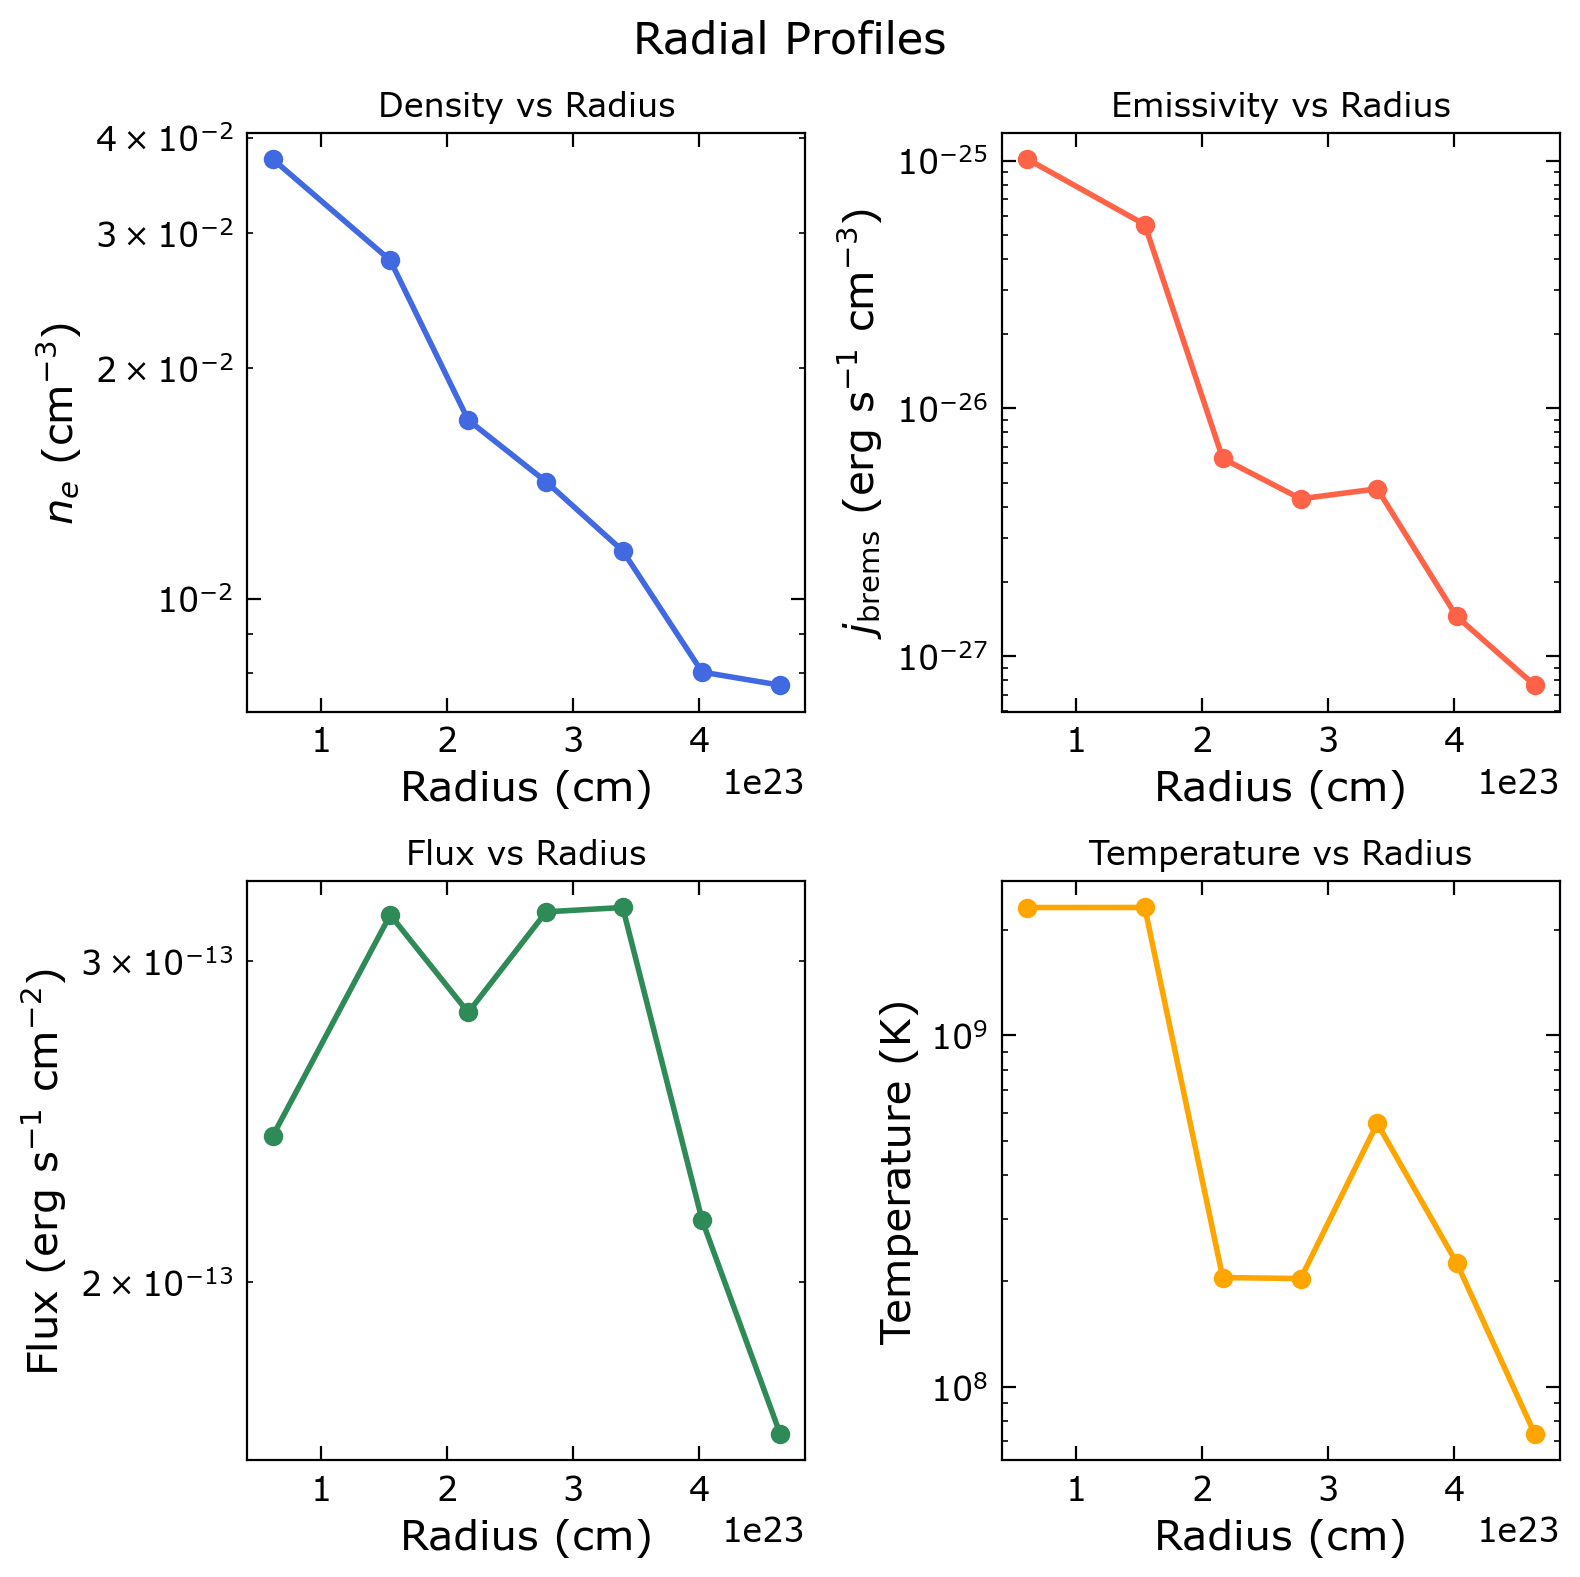

In [24]:
r_vals = np.array([r.value for r in radius_list])
dens_vals = np.array([n.value for n in density_list])
emis_vals = np.array([e.value for e in emissivity_list])
flux_vals = np.array([f.value for f in flux_list])
temp_vals = np.array([t.value for t in temperature_list])

r_log = np.log10(r_vals)

# Set up 1×4 figure
fig, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=False)
fig.suptitle("Radial Profiles", fontsize=16)

# Flatten axes array so axes[0..3] refer to the four subplots
axes = axes.flatten()

# 1. Electron density
axes[0].plot(r_vals, dens_vals, 'o-', color='royalblue', lw=2)
axes[0].set_title("Density vs Radius")
axes[0].set_xlabel("Radius (cm)")
axes[0].set_ylabel(r"$n_e$ (cm$^{-3}$)")
# axes[0].set_xscale('log')
axes[0].set_yscale('log')

# 2. Emissivity
axes[1].plot(r_vals, emis_vals, 'o-', color='tomato', lw=2)
axes[1].set_title("Emissivity vs Radius")
axes[1].set_xlabel("Radius (cm)")
axes[1].set_ylabel(r"$j_{\rm brems}$ (erg s$^{-1}$ cm$^{-3}$)")
# axes[1].set_xscale('log')
axes[1].set_yscale('log')

# 3. Flux
axes[2].plot(r_vals, flux_vals, 'o-', color='seagreen', lw=2)
axes[2].set_title("Flux vs Radius")
axes[2].set_xlabel("Radius (cm)")
axes[2].set_ylabel("Flux (erg s$^{-1}$ cm$^{-2}$)")
# axes[2].set_xscale('log')
axes[2].set_yscale('log')

# 4. Temperature
axes[3].plot(r_vals, temp_vals, 'o-', color='orange', lw=2)
axes[3].set_title("Temperature vs Radius")
axes[3].set_xlabel("Radius (cm)")
axes[3].set_ylabel("Temperature (K)")
# axes[3].set_xscale('log')
axes[3].set_yscale('log')

plt.tight_layout()
# plt.subplots_adjust(top=0.85)
plt.savefig("/Users/bsegovia/Downloads/ASTRO_532/Gal_Cluster_18466/primary/radial_profiles.png", dpi=300)
plt.show()

### Calculating Mass of Cluster 

In [25]:
k_B = const.k_B.to(u.cm**2 * u.g / (u.s**2 * u.K))
M = 5 * r_out_8 * k_B * T_8 / (const.G * const.m_p)
M.to(u.Msun)

<Quantity 1.13319974e+14 solMass>